A demonstration of pycnocline depth and thickness diagnostics. The first and second depth moments of stratification are computed as proxies for pycnocline depth and thickness, suitable for a nearly two-layer fluid.

Note that in the AMM7 example data the plots are not particularly spectacular as the internal tide is poorly resolved at 7km.

### Relevant imports and filepath configuration

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import coast
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors  # colormap fiddling

In [6]:
# set some paths
root = "../../"
dn_files = root + "./example_files/"
fn_nemo_grid_t_dat = dn_files + "nemo_data_T_grid_Aug2015.nc"
fn_nemo_dom = dn_files + "coast_example_nemo_domain.nc"
config_t = root + "./config/example_nemo_grid_t.json"
config_w = root + "./config/example_nemo_grid_w.json"

### Loading data

In [7]:
# Create a Gridded object and load in the data:

nemo_t = coast.Gridded(fn_nemo_grid_t_dat, fn_nemo_dom, config=config_t)

In [8]:
#nemo_t.dataset # uncomment to print data object summary

In [9]:
# The stratification variables are computed as centred differences of the t-grid variables. 
# These will become w-grid variables. So, create an empty w-grid object, to store stratification. 
# Note how we do not pass a NEMO data file for this load.
nemo_w = coast.Gridded(fn_domain=fn_nemo_dom, config=config_w)


### Subset the domain

We are not interested in the whole doman so it is computationally efficient to subset the data for the region of interest. Here we will look at the North Sea between (51N: 62N) and (-4E:15E).
We will great subset objects for both the t- and w-grids:

In [10]:
ind_2d = nemo_t.subset_indices(start=[51,-4], end=[62,15])
nemo_nwes_t = nemo_t.isel(y_dim=ind_2d[0], x_dim=ind_2d[1]) #nwes = northwest european shelf
ind_2d = nemo_w.subset_indices(start=[51,-4], end=[62,15])
nemo_nwes_w = nemo_w.isel(y_dim=ind_2d[0], x_dim=ind_2d[1]) #nwes = northwest european shelf
#nemo_nwes_t.dataset # uncomment to print data object summary

### Diagnostic calculations and plotting 

We can use a COAsT method to construct the in-situ density:


In [11]:
nemo_nwes_t.construct_density( eos='EOS10' )


Then we construct stratification using a COAsT method to take the vertical derivative. Noting that the inputs are on t-pts and the outputs are on w-pt

In [12]:
nemo_nwes_w = nemo_nwes_t.differentiate( 'density', dim='z_dim', out_var_str='rho_dz', out_obj=nemo_nwes_w ) # --> sci_nwes_w.rho_dz


This has created a variable called `nemo_nwes_w.rho_dz`.

###  Create internal tide diagnostics

We can now use the GriddedStratification class to construct the first and second moments (over depth) of density. In the limit of an idealised two-layer fluid these converge to the depth and thickness of the interface. I.e. the pycnocline depth and thickness respectively.

In [13]:

strat = coast.GriddedStratification(nemo_nwes_t)

#%%  Construct pycnocline variables: depth and thickness
strat.construct_pycnocline_vars( nemo_nwes_t, nemo_nwes_w )

### Plotting data

Finally we plot pycnocline variables (depth and thickness) using an GriddedStratification method:

(<Figure size 1000x1000 with 2 Axes>,
 <Axes: title={'center': '01 Aug 2015: masked pycnocline thickness (m)'}, xlabel='longitude', ylabel='latitude'>)

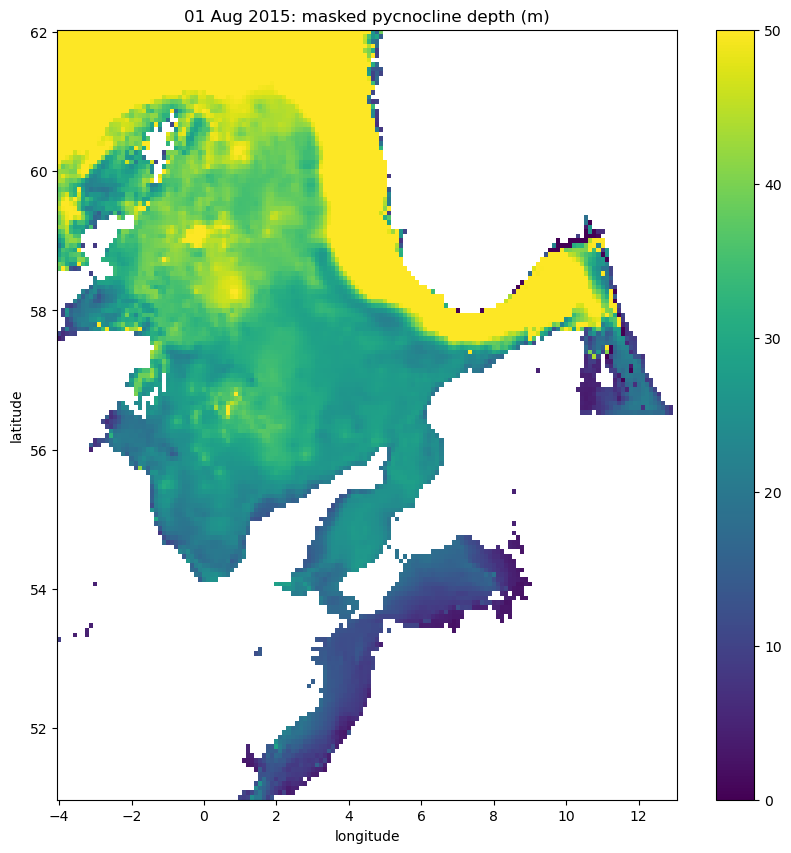

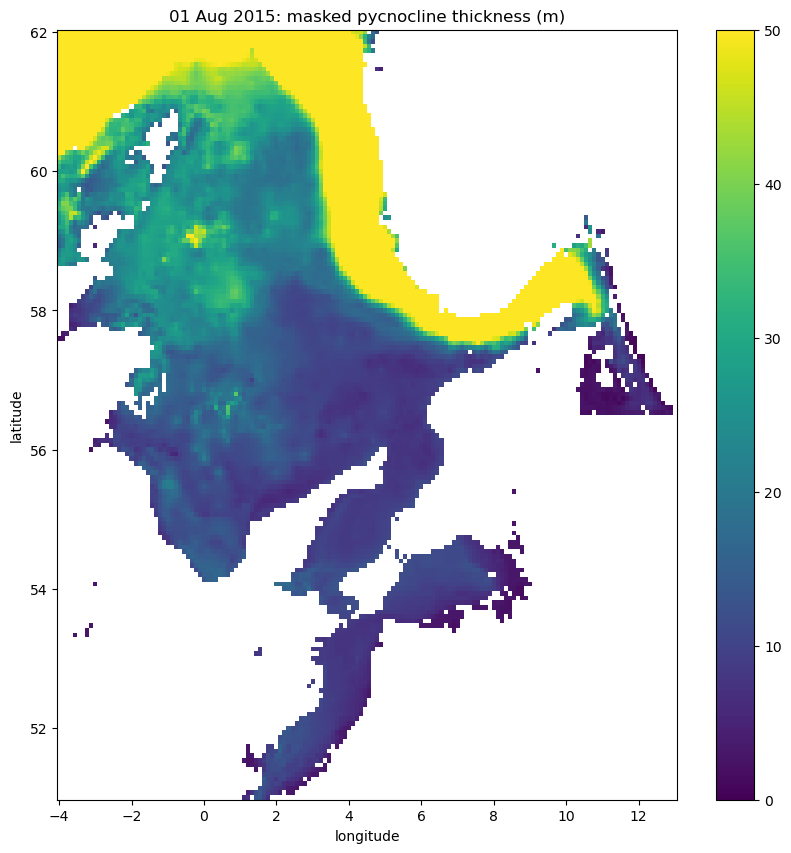

In [14]:
strat.quick_plot()
